In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.json', 'train.json', 'sample_submission.csv']


In [2]:
train_df = pd.read_json('../input/train.json')
test_df = pd.read_json("../input/test.json")
train_df.head()

TypeError: read_json() got an unexpected keyword argument 'records'

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39481 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          39481 non-null float64
bedrooms           39481 non-null int64
building_id        39481 non-null object
created            39481 non-null object
description        39481 non-null object
display_address    39481 non-null object
features           39481 non-null object
interest_level     39481 non-null object
latitude           39481 non-null float64
listing_id         39481 non-null int64
longitude          39481 non-null float64
manager_id         39481 non-null object
photos             39481 non-null object
price              39481 non-null int64
street_address     39481 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 4.8+ MB


**Numerical attributes**: bathrooms, bedrooms, latitude, longitude, price  
**Text attributes**: description, display_address, features, street_address  
**Other useful attributes**: created, manager_id  
**Useless attributes**: building_id - captured through latlong, display_address etc,.

In [4]:
print("Train Rows : ", train_df.shape[0])
print("Test Rows : ", test_df.shape[0])

Train Rows :  39481
Test Rows :  9871


In [5]:
train_df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,39481.000000,39481.000000,39481.000000,39481.000000,39481.000000,3.948100e+04
mean,1.213964,1.543933,40.741070,24681.670170,-73.954859,3.817728e+03
std,0.501449,1.115358,0.651838,14255.105309,1.203249,2.334313e+04
min,0.000000,0.000000,0.000000,0.000000,-118.271000,4.300000e+01
25%,1.000000,1.000000,40.728200,12407.000000,-73.991700,2.500000e+03
50%,1.000000,1.000000,40.751800,24665.000000,-73.977900,3.150000e+03
75%,1.000000,2.000000,40.774200,37051.000000,-73.954800,4.108000e+03
max,10.000000,7.000000,44.883500,49351.000000,0.000000,4.490000e+06


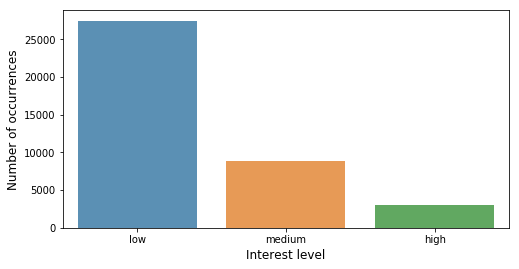

In [6]:
# Analyzing output labels

int_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8)
plt.ylabel('Number of occurrences', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show()

**Inference**: The training data is biased towards low interest levels. We have relatively negligible records for high interest records. But this is logically consistent.

In [7]:
train_df.corr()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.534493,-0.013338,-0.007960,0.013734,0.065493
bedrooms,0.534493,1.000000,-0.007508,-0.005565,0.008779,0.049353
latitude,-0.013338,-0.007508,1.000000,-0.007934,-0.964796,-0.000949
listing_id,-0.007960,-0.005565,-0.007934,1.000000,0.008552,-0.007588
longitude,0.013734,0.008779,-0.964796,0.008552,1.000000,-0.000015
price,0.065493,0.049353,-0.000949,-0.007588,-0.000015,1.000000


**Inference**: Bathrooms and Bedrooms have strong correlation.

# Analysis of "Bathrooms" attribute

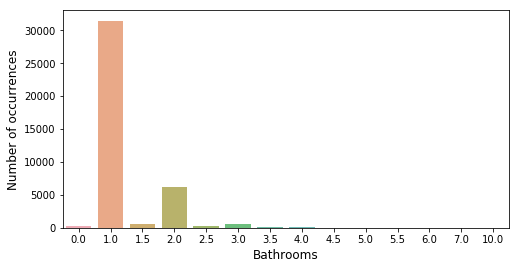

In [8]:
cnt_srs = train_df['bathrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of occurrences', fontsize=12)
plt.xlabel('Bathrooms', fontsize=12)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


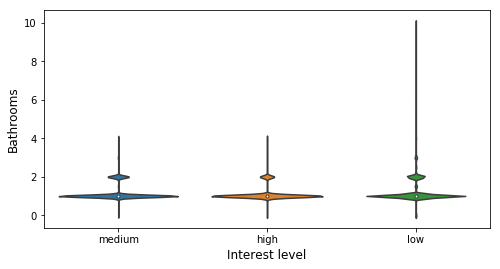

In [9]:
plt.figure(figsize=(8,4))
sns.violinplot(x='interest_level', y='bathrooms', data=train_df)
plt.xlabel('Interest level', fontsize=12)
plt.ylabel('Bathrooms', fontsize=12)
plt.show()

If bathrooms are greater than 4 then interest level is low. Due to fewer records having number of bathrooms greater than 4 it makes sense to group everything greater than 4 into 4 itself.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


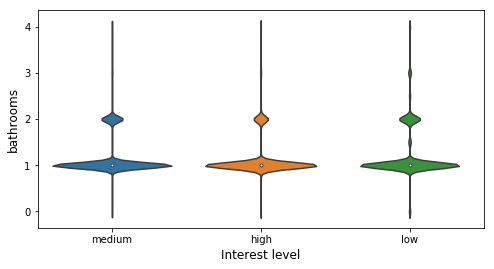

In [10]:
train_df.loc[train_df['bathrooms'] >= 4, 'bathrooms'] = 4
plt.figure(figsize=(8,4))
sns.violinplot(x='interest_level', y='bathrooms', data=train_df)
plt.xlabel('Interest level', fontsize=12)
plt.ylabel('bathrooms', fontsize=12)
plt.show()

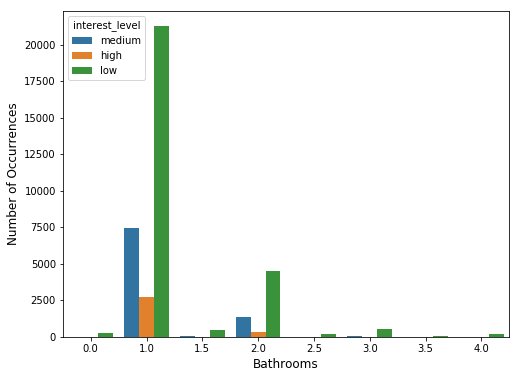

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(x='bathrooms', hue='interest_level', data=train_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Bathrooms', fontsize=12)
plt.show()

The violin plot shows that interest_level has different values for the same number of bathrooms since the quartiles almost coincide. This might mean there isn't a direct correlation between number of bathrooms and interest.

# Analysis of "Bedrooms" Attribute

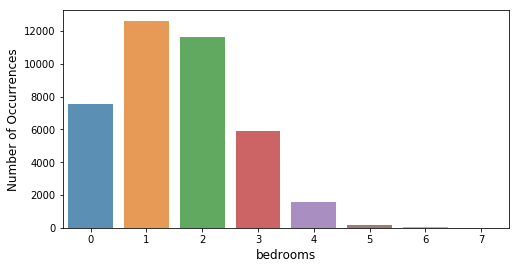

In [12]:
cnt_srs = train_df['bedrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

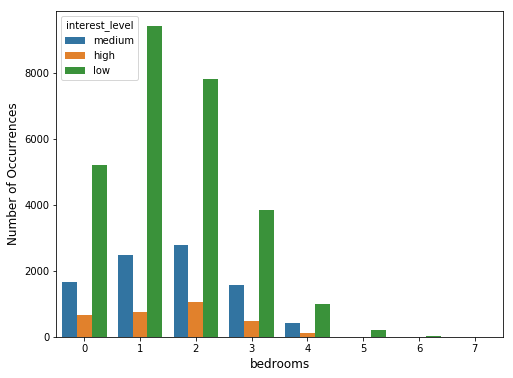

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms', hue='interest_level', data=train_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

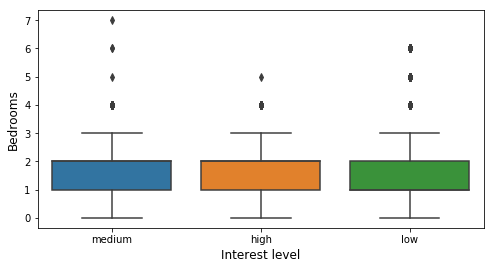

In [14]:
plt.figure(figsize=(8,4))
sns.boxplot(x='interest_level', y='bedrooms', data=train_df)
plt.xlabel('Interest level', fontsize=12)
plt.ylabel('Bedrooms', fontsize=12)
plt.show()

For each category there is a guassian like distribution with respect to number of bedrooms. The quantiles almost coincide for all three categories which might mean that there isn't a direct relation between number of bedrooms and interest.

# Analysis of "Price" attribute

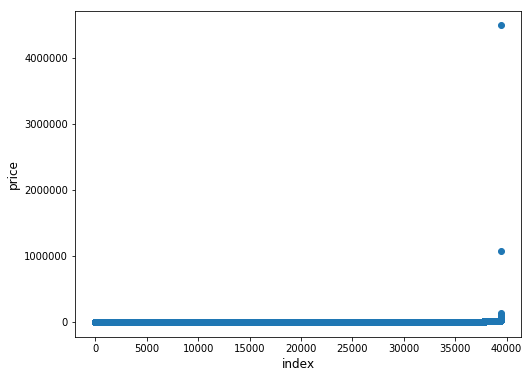

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.price.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

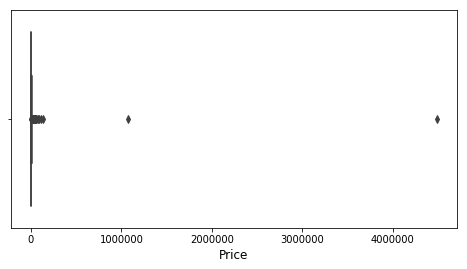

In [16]:
plt.figure(figsize=(8,4))
sns.boxplot(x='price', data=train_df)
plt.xlabel('Price', fontsize=12)
plt.show()

In [17]:
print(len(train_df[train_df['price'] >= 1000000]))
print(len(train_df[train_df['price'] >= 100000]))
print(len(train_df[train_df['price'] >= 50000]))
print(len(train_df[train_df['price'] >= 25000]))
print(len(train_df[train_df['price'] >= 20000]))
print(len(train_df[train_df['price'] >= 15000]))
print(len(train_df[train_df['price'] >= 10000]))

2
4
13
61
105
255
789


The 75th percentile is around 4000. And number of records above 15000 is just 205 while there are around 500 between 10000 and 15000. Thus, 15000 can be upper bound for keeping records.

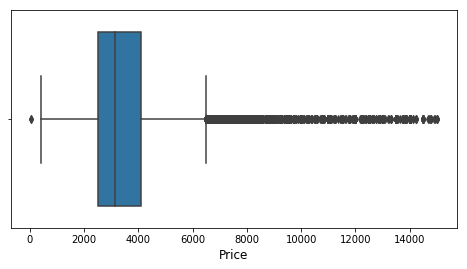

In [18]:
train_df.drop(train_df[train_df['price'] >= 15000].index, inplace = True)

plt.figure(figsize=(8,4))
sns.boxplot(x='price', data=train_df)
plt.xlabel('Price', fontsize=12)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


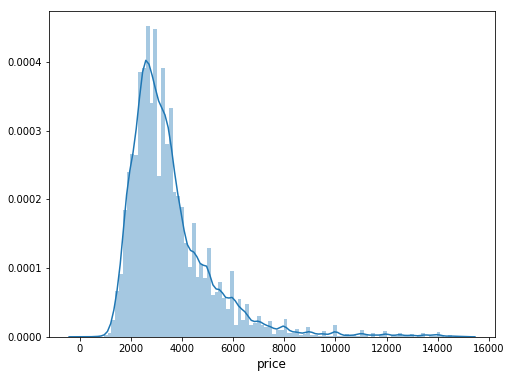

In [19]:
plt.figure(figsize=(8,6))
sns.distplot(train_df.price.values, bins=100, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

This distribution looks more logical. There are outliers but they are greater in number, so they might be important to the model. Moreover outlier values follow the distribution to a certain extent.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


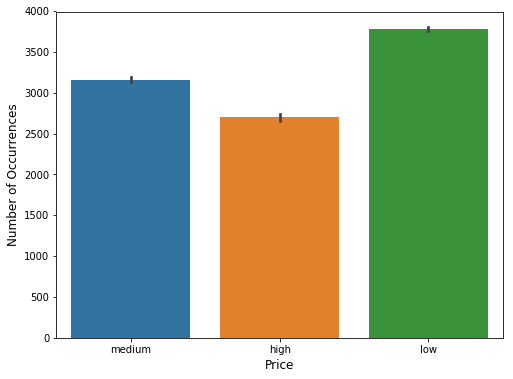

In [20]:
plt.figure(figsize=(8,6))
sns.barplot(y='price', x='interest_level', data=train_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Price', fontsize=12)
plt.show()

The above plot shows that greater the price lower the interest_level on average which is logically consistent.

# Analysis of "Latitude" attribute

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='latitude', data=train_df)
plt.xlabel('Latitude', fontsize=12)
plt.show()

Clearly there are incorrect values for latitude that are close to 0. A lot of values are concentrated from 40.5 to 41. There are not a lot of outliers so it might make sense to approximate or remove all outliers. For analysis, we'll approximate top and bottom 1%.

In [ ]:
llimit = np.percentile(train_df.latitude.values, 1)
ulimit = np.percentile(train_df.latitude.values, 99)

print("Lower limit for latitude being set as:", llimit)
print("Upper limit for latitude being set as:", ulimit)

train_df.loc[train_df['latitude'] < llimit, 'latitude'] = llimit
train_df.loc[train_df['latitude'] > ulimit, 'latitude'] = ulimit

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='latitude', data=train_df)
plt.xlabel('Latitude', fontsize=12)
plt.show()

plt.figure(figsize=(8,6))
sns.distplot(train_df.latitude.values, bins=50, kde=False)
plt.xlabel('l=Latitude', fontsize=12)
plt.show()

Although due to our approximation there is a small spike towards the ends, we get a much better distribution now.

# Analysis of "Longitude" attribute

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='longitude', data=train_df)
plt.xlabel('Longitude', fontsize=12)
plt.show()

Once again there are seemingly incorrect values for longitude. We'll adopt the previous approach of approximating the first and last 1% records to get the distribution of remaining records.

In [ ]:
llimit = np.percentile(train_df.longitude.values, 1)
ulimit = np.percentile(train_df.longitude.values, 99)

print("Lower limit for longitude being set as:", llimit)
print("Upper limit for longitude being set as:", ulimit)

train_df.loc[train_df['longitude'] < llimit, 'longitude'] = llimit
train_df.loc[train_df['longitude'] > ulimit, 'longitude'] = ulimit

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='longitude', data=train_df)
plt.xlabel('longitude', fontsize=12)
plt.show()

plt.figure(figsize=(8,6))
sns.distplot(train_df.longitude.values, bins=50, kde=False)
plt.xlabel('Longitude', fontsize=12)
plt.show()

The right tail of the distribution doesn't look very "nice" though.

# Analysis of LatLong pairs

In [ ]:
sns.pairplot(x_vars=['latitude'], y_vars=['longitude'], data=train_df, hue="interest_level", size=13)

The lines at the edges are most probably due to our approximation for top and bottom 1% records.

The only pattern I can find is that bottom right are usually low and top left areas have more high interest plots. I was thinking that we can convert the latlong pairs into categorical values by kind of grouping points in the same area if they also have same interest level. But that seems hard here.

# Summary of analysis of numerical attributes

**Numerical attributes**: bathrooms, bedrooms, latitude, longitude, price  

## Bathrooms
- If a house has more than 4 bathrooms then it has only low interest levels. So converting bathroom values greater than 4 to 4 will help analyze data.
- There is a strong correlation between number of bathrooms and number of bedrooms (about 0.5).
- There doesn't seem to be a clear relation between interest level and number of bathrooms since the quartiles coincide for all interest levels.

## Bedrooms
- The number of bedrooms seemed to have reasonable values and a guassian like distribution. There didn't seem any need for sanitization.
- Similar to bathrooms, there doesn't seem to be a correlation between number of bedrooms and interest since the quartiles are almost the same for all interest levels.

## Prices
- There are a few incorrect values i.e. random skips in the distribution. A reasonable upper bound was found to be 15000, because only ~200 datapoints had a price greater than 15000.
- However there are around 2000 outliers if Inter Quartile Range is used. The upper bound here seems to be close to 7000. There are some outliers close to 0 also. Dropping or correcting these 2000 values might make a difference.
- There is a clear relation between price and interest level (as seen by the mean). Greater the price, lower the interest level.

## Latitude and Longitude
- Both latitude and longitude had a few incorrect values i.e. random jumps in values. We approximated the top and bottom 1% records to the upper limit and lower limit respectively. We get a guassian like distribution for latitudes but a skewed distribution for longitudes.
- Plotting a scatterplot of latlong pairs doesn't show any special relationship between areas and interest level except maybe that bottom right points are usually low and top left points have more high interest plots. Converting the latlong pairs into categorical values by grouping points in the same area if they also have same interest level would help us combine the information provided by latitude and longitude, however that doesn't seem to do any benefit here. But its worth exploring.

We have to deal with a lot of outliers in this data set. We have to decide on what points are outliers and how to deal with them.  
For identifying outliers: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba  
We can either remove or approximate outliers.

# TODO
- Analyze text attributes